In [82]:
import os
import nltk
stopwords = nltk.corpus.stopwords.words("english")

The following cell combines all the texts, however I was unable to figure out how to work with them combined (everything printed blank when calling from "maisel".

In [83]:
import glob
import errno
path = '*.txt'
files = glob.glob(path)
for name in files:
    try:
        with open(name) as f:
            for line in f:
                maisel = line.split()
                #print(maisel)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

This lists all the plain text files (I had to move them to my main directory for the project from their subdirectory to make this work). Files were given the same name as the title of the work.

In [84]:
%ls *.txt

A Peg in a Round Hole.txt
Already I knew the list of crimes.txt
Break It To Me Gently.txt
Chocolate Cake and Confessions.txt
Femme de Rochas.txt
Her husband is known in the gates.txt
Telephone Philosophies.txt
The color of hard crimson.txt
a kiss is just a kiss.txt
a moment.txt
a muse.txt
a regular sherlock holmes.txt
all i ever wanted to be.txt
burgers.txt
can't you just lie.txt
daydream believer.txt
don't ask me why.txt
don't hold back.txt
dreams on the windowsill.txt
driving me mad cause shes so heavy.txt
fish in the sea.txt
gaslight blues.txt
good best.txt
got a renegade heart.txt
his mine ours.txt
how the thought of you does things to me.txt
if you leave the light on then i'll leave the light on.txt
in the crystalline knowledge of you.txt
just you and me in a room.txt
like a scarlet thread.txt
never been good at this nice shit.txt
new beginnings.txt
no we didn't.txt
not a full sentance.txt
not so alone.txt
only what is.txt
real or only fun.txt
retrouvailles.txt
scratch that.txt
so

The following cell is changed for each file name to find collocates in that text. All subsequent cells must be re-run as well.

In [85]:
targetText = "a kiss is just a kiss.txt" #the file name is what is modified each time

with open(targetText, "r") as f:
    theText = f.read()

In [88]:
import re
theTokens = re.findall(r'\b\w[\w-]*\b',theText.lower())
theRealTokens = [word for word in theTokens \
        if word not in stopwords]
print(theRealTokens)

['happened', 'recognises', 'else', 'would', 'start', 'telephone', 'conversation', 'like', 'walked', 'mrs', 'maisel', 'lenny', 'says', 'pretty', 'sure', 'mama', 'weissmann', 'leave', 'little', 'midgelet', 'walk', 'home', 'rain', 'alone', 'talking', 'midge', 'shouts', 'line', 'whole', 'alone', 'spiel', 'fault', 'happened', 'never', 'would', 'done', 'made', 'fucking', 'sad', 'really', 'draws', 'last', 'word', 'milking', 'like', 'stage', 'one', 'kiss', 'midge', 'friends', 'even', 'cop', 'feel', 'hardly', 'tongue', 'liar', 'hisses', 'tongue', 'felt', 'goddamn', 'bad', 'went', 'half', 'way', 'across', 'town', 'kissed', 'ex-husband', 'kissed', 'ex-husband', 'tongue', 'try', 'turn', 'joke', 'mister', 'serious', 'serious', 'says', 'deadpan', 'know', 'many', 'times', 'deny', 'sex', 'embarrassing', 'pretty', 'sure', 'never', 'convince', 'sweaty', 'leering', 'old', 'schmuck', 'fuck', 'famous', 'comedian', 'get', 'ahead', 'kidding', 'tell', 'mort', 'sahl', 'made', 'sweet', 'love', 'time', 'serious'

In [89]:
characterFinder = input("What character name do you want collocates for? Enter the name in all lowercase (miniscule) letters. ")
context = 3

end = len(theRealTokens)
counter = 0
collocates = []
for word in theRealTokens:
    if word == characterFinder: 
        for i in range(context):
            if (counter - (i + 1)) >= 0: 
                collocates.append(theRealTokens[(counter - (i + 1))])
            if (counter + (i + 1)) < end: 
                collocates.append(theRealTokens[(counter + (i + 1))])
    counter = counter + 1
    
print(collocates)

What character name do you want collocates for? Enter the name in all lowercase (miniscule) letters. midge
['talking', 'shouts', 'alone', 'line', 'rain', 'whole', 'kiss', 'friends', 'one', 'even', 'stage', 'cop', 'leonard', 'whispers', 'serious', 'voice', 'time', 'dips', 'oh', 'reflects', 'ex-husband', 'made', 'kiss', 'heart', 'nice', 'says', 'head', 'sternly', 'forming', 'come', 'friend', 'still', 'yacking', 'come', 'coffee', 'freeze', 'come', 'drink', 'guess', 'promise', 'educated', 'perfect', 'like', 'probably', 'girl', 'apartment', 'mess', 'cleaned', 'worried', 'even', 'turns', 'look', 'bed', 'twice', 'girl', 'breathes', 'kind', 'next', 'protests', 'thing', 'see', 'says', 'clutter', 'looking', 'chairs', 'around', 'fluke', 'says', 'sure', 'fluke', 'wanted', 'lenny', 'talking', 'breathes', 'look', 'maybe', 'mind', 'enough', 'suit', 'explains', 'might', 'suit', 'thought', 'maybe', 'impressed', 'says', 'intelligence', 'shrugging', 'high', 'dress', 'dare', 'shrieks', 'brassiere', 'serio

In [74]:
print(set(collocates))

{'laughs', 'has', 'her', 'away', 'already', 'she', 'shrieks', 'you', 'girl', 'next', 'whispers', 'm', 'do', 'i', 'hand', 's', 'explains', 'come', 'god', 'helped', 'are', 'friend', 'many', 'out', 'children', 'nice', 'lets', 'why', 'reflects', 'apples', 'right', 'nervously', 'breathlessly', 'shouts', 'be', 'of', 'pert', 'who', 'didn', 'fluke', 'so', 'cue', 'about', 'down', 'breathes', 'drink', 'knot', 'dare', 'kiss', 'that', 'sternly', 't', 'around', 'voice', 'head', 'see', 'looking', 'says', 'two', 'moans', 'shrugs', 'up', 'impressed', 'one', 'with', 'serious', 'friends', 'oh', 'probably', 'the', 'on', 'what', 'still', 'because', 'shrugging', 'have', 'if', 'can', 'times', 'a', 'wasn', 'leonard', 'kind', 'doesn', 'talking', 'maybe', 'between', 'he', 'even', 'suit', 'like', 'guess', 'worried'}


In [90]:
tokenDist = nltk.FreqDist(collocates)
tokenDist.tabulate()

        says      serious         come      talking         kiss          one         even           oh         like         girl         look     breathes        fluke        maybe         suit          two        moans       laughs         many       shouts        alone         line         rain        whole      friends        stage          cop      leonard     whispers        voice         time         dips     reflects   ex-husband         made        heart         nice         head      sternly      forming       friend        still      yacking       coffee       freeze        drink        guess      promise     educated      perfect     probably    apartment         mess      cleaned      worried        turns          bed        twice         kind         next     protests        thing          see      clutter      looking       chairs       around         sure       wanted        lenny         mind       enough     explains        might      thought    impressed intelligence

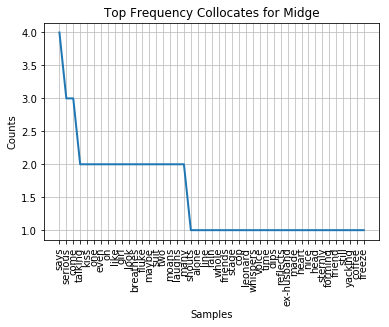

In [91]:
import matplotlib
%matplotlib inline
tokenDist.plot(45, title="Top Frequency Collocates for " + characterFinder.capitalize())

Most of the top frequecy collocates are verbs, nouns, or other characters. This is not particularly helpful for my purposes. Thus, the followign cells adress the top frequency adjectives and adverbs.

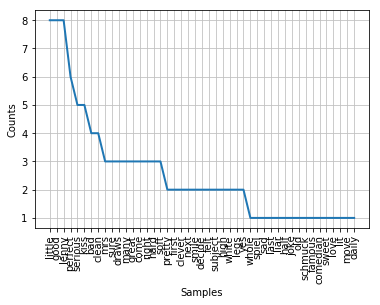

In [92]:
maiselTagged = nltk.pos_tag(theRealTokens)
maiselAdjectives = [token for token, pos in maiselTagged if "JJ" == pos]
maiselAdjectivesFreqs = nltk.FreqDist(maiselAdjectives)
maiselAdjectivesFreqs.plot(45)

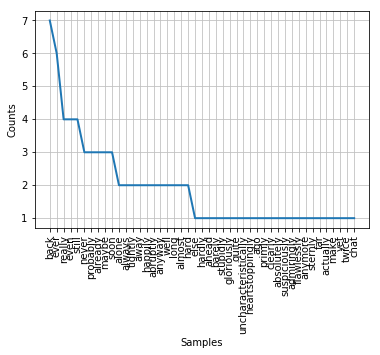

In [93]:
maiselTagged = nltk.pos_tag(theRealTokens)
maiselAdverbs = [token for token, pos in maiselTagged if "RB" == pos]
maiselAdverbsFreqs = nltk.FreqDist(maiselAdverbs)
maiselAdverbsFreqs.plot(45)

Many of the included tokens are not adjectives or adverbs, but tose that are the correct parts of speech provide a place to start looking using Voyant.